In [2]:
from transformers import AutoImageProcessor, AutoModelForImageClassification
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

# initialize processor and model
preprocessor = AutoImageProcessor.from_pretrained("google/mobilenet_v2_1.0_224")
model = AutoModelForImageClassification.from_pretrained("google/mobilenet_v2_1.0_224")

# preprocess the inputs
inputs = preprocessor(images=image, return_tensors="pt")

# get the output and the class labels
outputs = model(**inputs)
logits = outputs.logits

predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: tabby, tabby cat


C: 0.5882352941176471, Gc: 0.4411764705882353, Bc: 0.3235294117647059, P: 1.0, Ro: 0.12849162011173185


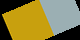

In [734]:
from random import *
from PIL import Image
import requests

r1 = randint(0, 255)
g1 = randint(0, 255)
b1 = randint(0, 255)
r2 = randint(0, 255)
g2 = randint(0, 255)
b2 = randint(0, 255)
p = randint(-7, 7)
r = randint(0, 179)
ow = 40
w = 20

img1 = Image.new("RGB", (ow, ow), (r1, g1, b1))
img2 = Image.new("RGB", (ow, ow), (r2, g2, b2))
nw = 2*ow
nh = ow
img = Image.new("RGB", (nw, nh))
img.paste(img1, (p, 0))
img.paste(img2, (ow+p, 0))
img = img.rotate(r, resample=Image.Resampling.BICUBIC)
# img = img.rotate(r)

left = (nw - w)/2
top = (nh - w)/2
right = (nw + w)/2
bottom = (nh + w)/2

o = img.crop((left, top, right, bottom))
c = (3*r1-3*r2 + 765) / 1530
gc = ((g1-r1) - (g2 -r2) + 510) / 1020
bc = ((2*b1 - r1 - g1) -(2*b2 - r2 - g2)  + 1020) / 2040
P = (p+7)/14
Ro = r / 179
print(f'C: {c}, Gc: {gc}, Bc: {bc}, P: {P}, Ro: {Ro}')
img

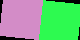

In [575]:
img

In [569]:
import pandas as pd
data = [[1, 2, 3, 4]]
df = pd.DataFrame(data, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,1,2,3,4
